<a href="https://colab.research.google.com/github/Aliciawang980309/STAT-432-Final-Project/blob/master/STAT430_FinalProject_vvn_ver_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
is_google_colab = True
import sys
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 377489 (delta 1), reused 317 (delta 1), pack-reused 377165
Receiving objects: 100% (377489/377489), 2.06 GiB | 39.23 MiB/s, done.
Resolving deltas: 100% (1161/1161), done.
Checking out files: 100% (82215/82215), done.


In [0]:
train_dir = "./Fruit-Images-Dataset/Training/"
test_dir = './Fruit-Images-Dataset/Test/'

In [0]:
!ls

Fruit-Images-Dataset  sample_data


In [0]:
from sklearn.datasets import load_files
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels
    
x_train, y_train, labels = load_dataset(train_dir)
x_test, y_test, _ = load_dataset(test_dir)

In [0]:
# def pick_banana_strawberry(data):
#   banana, strawberry = [], []
#   for pic in x_train:
#     if pic.split('/')[-2] == "Banana":
#       banana.append(pic)
#     if pic.split('/')[-2] == "Strawberry":
#       strawberry.append(pic)
#   return np.array(banana), np.array(strawberry)

In [0]:
# x_train_banana, x_train_strawberry = pick_banana_strawberry(x_train)
# x_test_banana, x_test_strawberry = pick_banana_strawberry(x_test)

In [0]:
# # 0 is Banana, 1 is Strawberry
# y_train_banana = np.full((x_train_banana.shape[0], 2), [1, 0])
# y_train_strawberry = np.full((x_train_strawberry.shape[0], 2), [0, 1])
# y_test_banana = np.full((x_test_banana.shape[0], 2), [1, 0])
# y_test_strawberry = np.full((x_test_strawberry.shape[0], 2), [0, 1])

In [0]:
# x_train = np.concatenate((x_train_banana, x_train_strawberry), axis = 0)
# y_train = np.concatenate((y_train_banana, y_train_strawberry), axis = 0)
# x_test = np.concatenate((x_test_banana, x_test_strawberry), axis = 0)
# y_test = np.concatenate((y_test_banana, y_test_strawberry), axis = 0)

In [0]:
x_train.shape

(61476,)

In [0]:
y_train.shape

(61476,)

In [0]:
y_train_categorical = np.zeros((y_train.shape[0], 120))
for i in range(y_train.shape[0]):
  y_train_categorical[i][y_train[i]] = 1

y_test_categorical = np.zeros((y_test.shape[0], 120))
for i in range(y_test.shape[0]):
  y_test_categorical[i][y_train[i]] = 1

In [0]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
y_train_categorical.shape

(61476, 120)

In [0]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array = []
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [0]:
x_train = np.array(convert_image_to_array(x_train))
x_test = np.array(convert_image_to_array(x_test))

print(x_train.shape)
print(x_test.shape)

(61476, 100, 100, 3)
(20618, 100, 100, 3)


In [0]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Conv2D(filters = 128, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dense(120, activation = 'softmax'))

model.compile(optimizer=SGD(lr=0.01), loss=categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)        

In [0]:
model_fit = model.fit(x_train, y_train_categorical, epochs = 10, validation_split=0.2)

Train on 49180 samples, validate on 12296 samples
Epoch 1/10
49180/49180 [==============================] - 35s 712us/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9998
Epoch 2/10
49180/49180 [==============================] - 35s 710us/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9998
Epoch 3/10
14912/49180 [========>.....................] - ETA: 21s - loss: 0.0111 - accuracy: 0.9999

KeyboardInterrupt: ignored

In [0]:
import random

idx = [random.randint(0, len(x_train)) for i in range(150)]

x_train_150, y_train_150 = x_train[idx], y_train[idx]

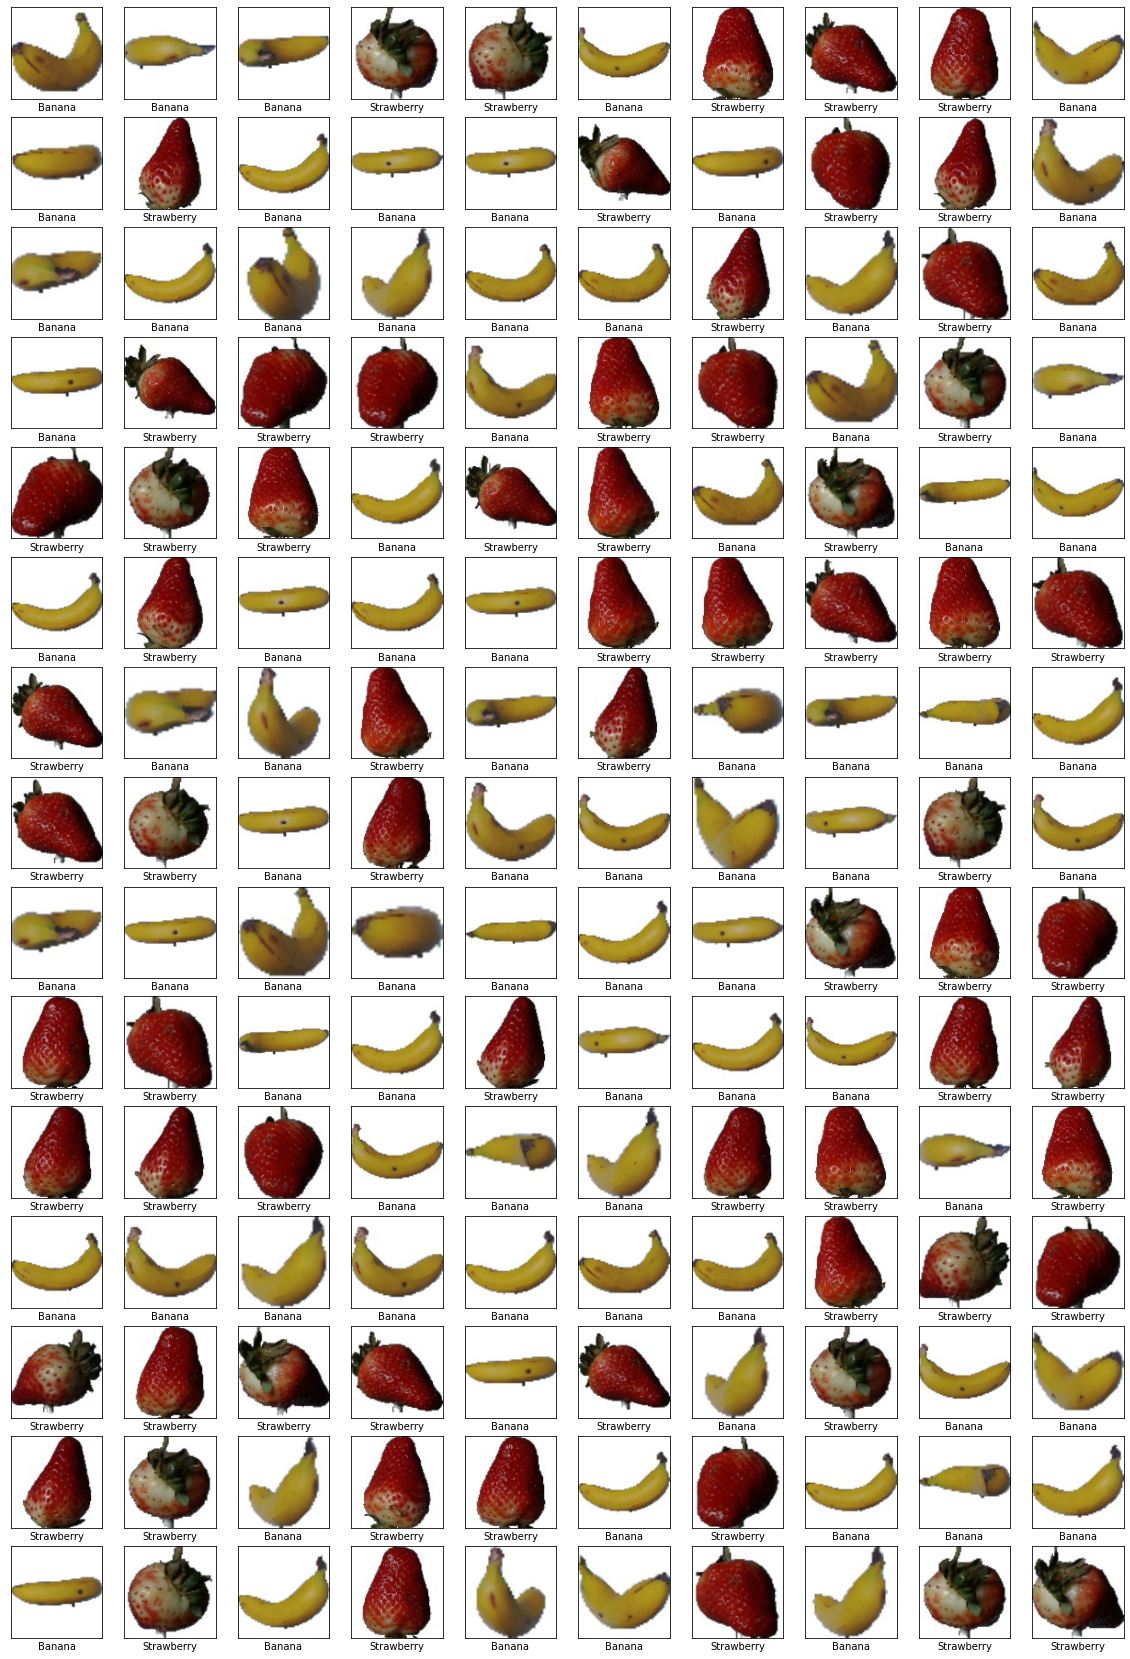

In [0]:
plt.figure(figsize=(20, 30))
for i in range(150):
    plt.subplot(15, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_150[i].astype('uint8'))
    plt.xlabel(labels[np.where(y_train_150[i] == 1)[0][0]])
plt.show()

In [0]:
model.evaluate(x_test, y_test, verbose = 2)

[0.002199773613625261, 1.0]

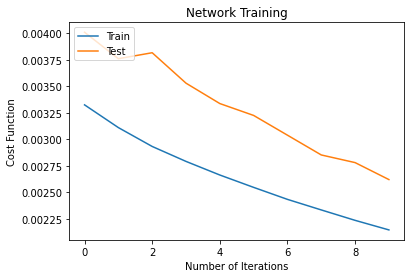

In [0]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Network Training')
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
plt.plot(model_trained.history['accuracy'], label='accuracy')
plt.plot(model_trained.history['val_accuracy'], label = 'val_accuracy')
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.show()